In [1]:
import tensorflow as tf
import numpy as np                      
import pandas as pd                     
import matplotlib.pyplot as plt  
import seaborn as sns

2023-02-10 14:00:59.313971: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data Preprocessing

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape , X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
class_names = ['0: airplane' , '1:automobile', '2:bird', '3:cat', '4:deer', '5:dog', '6:frog', '7:horse', '8:ship', '9:truck']

In [6]:
X_train.max(),X_train.min(), X_train.mean()

(255, 0, 120.70756512369792)

In [7]:
y_train.max(),y_train.min()

(9, 0)

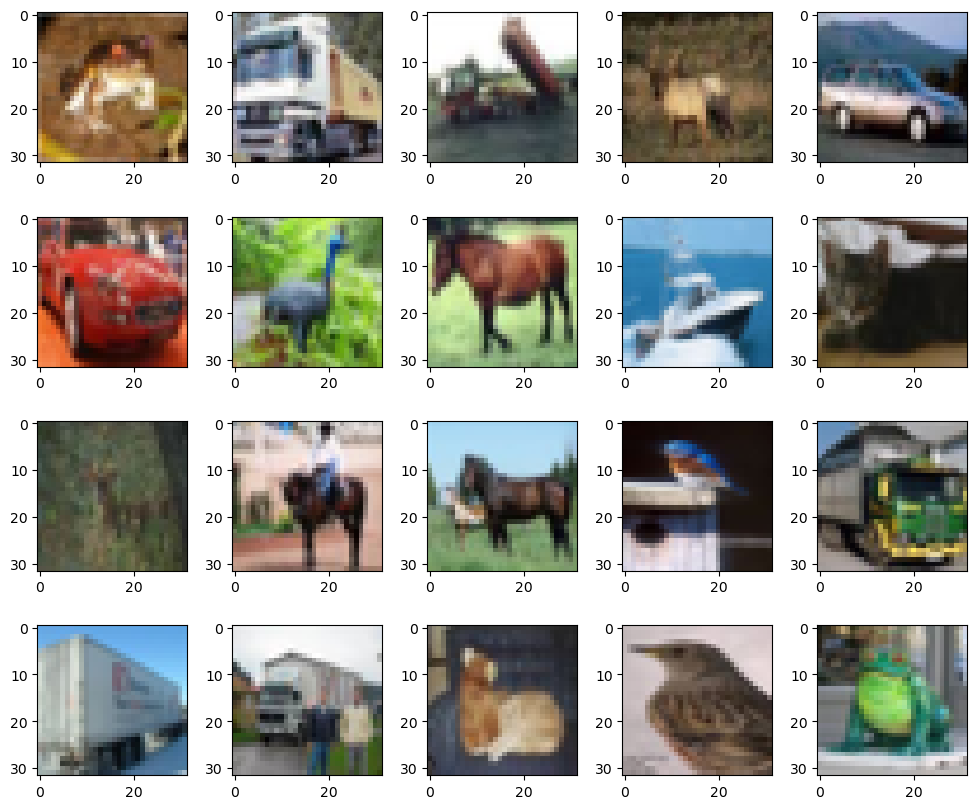

In [8]:
plot = plt.figure(figsize = (12, 10))
plot.subplots_adjust(hspace = 0.3, wspace = 0.3)
for i in range(20):
    a = plot.add_subplot(4, 5, i + 1)
    a.imshow(X_train[i])
    

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train.max(),X_train.min(), X_train.mean()

(1.0, 0.0, 0.4733630004850874)

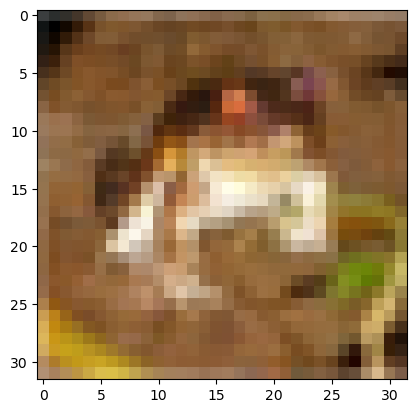

In [11]:
plt.imshow(X_train[0])

In [12]:
y_train[0]

array([6], dtype=uint8)

# Building CNN Model

In [13]:
model = tf.keras.models.Sequential()

2023-02-10 14:01:43.434415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# adding first CNN layer
# 1) filters (kernel) = 32
# 2) kernel size = 3
# 3) padding = same
# 4) activation = relu
# 5) input shape = (32,32,3)

In [15]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = [32, 32, 3]))                             

In [16]:
# adding second CNN layer
# 1) filters (kernel) = 32
# 2) kernel size = 3
# 3) padding = same
# 4) activation = relu

In [17]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu'))                              

In [18]:
# adding maxpool layer
# 1) pool_size = 2
# 2) stride = 2
# 3) padding = valid

In [19]:
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2 , padding = 'valid'))

In [20]:
# adding third CNN layer
# 1) filters (kernel) = 64
# 2) kernel size = 3
# 3) padding = same
# 4) activation = relu

In [21]:
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'))                              

In [22]:
# adding fourth CNN layer
# 1) filters (kernel) = 64
# 2) kernel size = 3
# 3) padding = same
# 4) activation = relu

In [23]:
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'))

In [24]:
# adding maxpool layer
# 1) pool_size = 2
# 2) stride = 2
# 3) padding = valid

In [25]:
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2 , padding = 'valid'))

In [26]:
# adding Dropout layer

In [27]:
model.add (tf.keras.layers.Dropout(0.4))

In [28]:
# adding flattening layer

In [29]:
model.add(tf.keras.layers.Flatten())

In [30]:
# adding first dense layer

In [31]:
model.add(tf.keras.layers.Dense(units = 128 , activation="relu"))  

In [32]:
# adding second dense layer

In [33]:
model.add(tf.keras.layers.Dense(units = 10 , activation="softmax"))  

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# Training Model

In [35]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_crossentropy'])

In [36]:
history = model.fit (X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
5000/5000 [==============================] - 211s 42ms/step - loss: 1.3487 - sparse_categorical_crossentropy: 1.3487
Epoch 2/10
5000/5000 [==============================] - 214s 43ms/step - loss: 0.9576 - sparse_categorical_crossentropy: 0.9576
Epoch 3/10
5000/5000 [==============================] - 211s 42ms/step - loss: 0.8272 - sparse_categorical_crossentropy: 0.8272
Epoch 4/10
5000/5000 [==============================] - 208s 42ms/step - loss: 0.7394 - sparse_categorical_crossentropy: 0.7394
Epoch 5/10
5000/5000 [==============================] - 211s 42ms/step - loss: 0.6825 - sparse_categorical_crossentropy: 0.6825
Epoch 6/10
5000/5000 [==============================] - 207s 41ms/step - loss: 0.6319 - sparse_categorical_crossentropy: 0.6319
Epoch 7/10
5000/5000 [==============================] - 205s 41ms/step - loss: 0.5932 - sparse_categorical_crossentropy: 0.5932
Epoch 8/10
5000/5000 [==============================] - 208s 42ms/step - loss: 0.5569 - sparse_categoric

# Model evaluation and Predictiont

In [38]:
test_loss , test_accuracy = model.evaluate (X_test,y_test)

313/313 [==============================] - 9s 28ms/step - loss: 0.7676 - sparse_categorical_crossentropy: 0.7676


In [43]:
print('Test Accuracy is:', format(test_accuracy, '0.4f'))

Test Accuracy is: 0.7676


In [45]:
y_pred = model.predict(X_test)

313/313 [==============================] - 9s 27ms/step


In [47]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([5, 8, 8, ..., 5, 1, 7])

In [48]:
print(y_pred[101]), print(y_test[101])

5
[5]


(None, None)

In [49]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusion_matrix(y_test, y_pred)

array([[765,  14,  50,  12,  14,   5,   4,   8,  89,  39],
       [  8, 869,   3,   3,   3,   3,   1,   1,  20,  89],
       [ 67,   7, 638,  32,  97,  76,  28,  28,  16,  11],
       [ 26,   9,  67, 439,  74, 226,  44,  52,  26,  37],
       [ 22,   2,  43,  39, 762,  38,  16,  60,  11,   7],
       [  7,   3,  37,  94,  29, 741,   9,  50,   9,  21],
       [ 14,  13,  45,  60,  58,  36, 730,  10,  19,  15],
       [ 16,   2,  24,  19,  42,  50,   2, 827,   3,  15],
       [ 36,  20,   7,   4,   3,   4,   3,   5, 890,  28],
       [ 15,  37,   1,   2,   3,   0,   2,   7,  26, 907]])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

75.68